# Import Libraries

In [4]:
import utility_func as util

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [5]:
curr_dir = (util.os.getcwd()).replace('\\', '/')
data_path = (util.os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [6]:
str_sed_data = util.pd.read_csv(data_path + '/Kodangal dataset/proc_elem_Kodangal_gcM.csv')

In [7]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,in_,f,te,tl,hg
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,5.746369,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,7.857656,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,8.728652,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,9.365000,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,10.693400,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0


In [8]:
sed_max_long = max(str_sed_data['longitude'])
sed_min_long = min(str_sed_data['longitude'])

sed_max_lat = max(str_sed_data['latitude'])
sed_min_lat = min(str_sed_data['latitude'])

print("Stream Sediment coordinates - ")

print(f"Maximum longitude co-ordinate: {sed_max_long}")
print(f"Minimum longitude co-ordinate: {sed_min_long}")

print(f"Maximum latitude co-ordinate: {sed_max_lat}")
print(f"Minimum latitude co-ordinate: {sed_min_lat}")

Stream Sediment coordinates - 
Maximum longitude co-ordinate: 77.98508
Minimum longitude co-ordinate: 77.25
Maximum latitude co-ordinate: 17.24396
Minimum latitude co-ordinate: 17.00904


# EDA

In [9]:
str_elem = util.elem_list(str_sed_data)

In [10]:
len(str_elem)

61

## PCA

### Normalize

In [13]:
str_elem_df = str_sed_data[str_elem]

sc = util.StandardScaler()

norm_str_elem = sc.fit_transform(str_elem_df)

norm_str_elem_df = util.pd.DataFrame(norm_str_elem, 
                                    index=str_elem_df.index, 
                                    columns=str_elem)

norm_str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,lu,hf,ta,w,u,in_,f,te,tl,hg
0,-2.158426,-1.527129,-1.029265,-1.042738,2.563934,0.290573,-0.705658,-1.436724,-0.668466,-0.014994,...,-1.180137,-1.234538,-0.926848,0.114237,-1.057892,-0.768386,1.123680,0.232971,-1.032214,-0.019406
1,-2.100516,-1.527129,-0.896378,-1.016834,2.563934,0.135672,-0.274817,-1.403623,-0.709733,-0.950072,...,-0.850892,-1.079798,-0.754606,0.000975,-0.915028,-0.912725,1.301972,-0.532328,-0.994433,-0.970301
2,-0.090626,-0.749434,0.328872,-0.057109,0.191167,0.855210,0.718511,-1.661811,-1.039059,-1.312653,...,-0.158468,-1.015961,0.085035,1.735006,-0.730034,1.916374,-0.366336,0.767588,-0.052905,-0.547681
3,0.352027,-1.168342,0.503211,0.071114,-0.155011,0.518760,0.574898,-1.220465,-1.152341,-0.950072,...,-0.017805,-0.969322,0.288546,2.018929,-0.631684,0.377387,-0.047956,-0.569139,-0.334385,-0.758991
4,0.217565,-1.265311,0.481876,0.084065,-0.472342,0.352200,0.455220,-1.264599,-1.217074,-1.312653,...,-0.064517,-0.871961,0.153720,1.192871,-0.534519,0.356772,0.843506,-0.678403,-0.234497,-1.075955


In [32]:
pca = util.PCA(n_components=10)
pca.fit(norm_str_elem_df)

PCA(n_components=10)

In [33]:
total_variance = sum(pca.explained_variance_)
desired_variance = 0.75
cumulative_variance = 0
num_comp = 0

for explained_variance_ in pca.explained_variance_:
    cumulative_variance += explained_variance_
    if cumulative_variance / total_variance >= desired_variance:
        break
    num_comp += 1

print(f"Number of components to explain atleast {desired_variance*100}% of variance: {num_comp}")

Number of components to explain atleast 75.0% of variance: 3


In [34]:
pca.explained_variance_ratio_

array([0.28134408, 0.2172177 , 0.08107948, 0.04206229, 0.04082802,
       0.03329496, 0.02379514, 0.02305133, 0.01893343, 0.01809554])

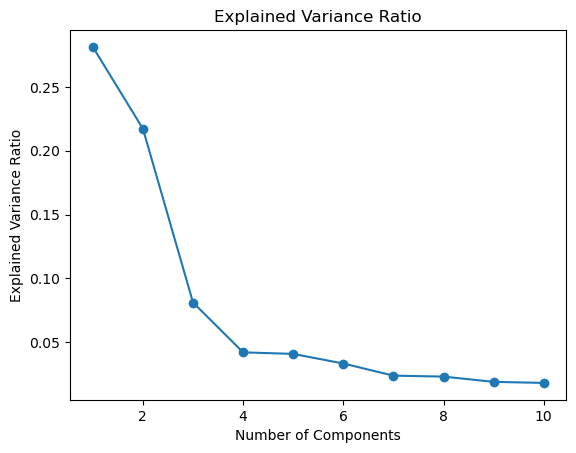

In [35]:
util.plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_, 
             marker='o')
util.plt.xlabel('Number of Components')
util.plt.ylabel('Explained Variance Ratio')
util.plt.title('Explained Variance Ratio')
util.plt.show()

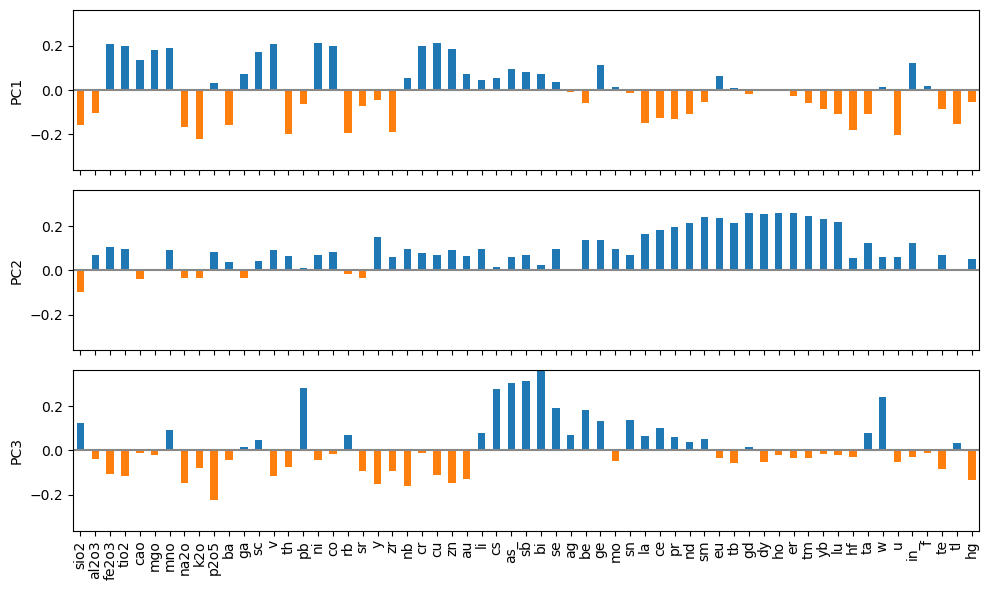

In [36]:
loadings = pca.components_
num_com_to_plot = 3
loadings_to_plot = loadings[:num_com_to_plot]
loadings_df = util.pd.DataFrame(loadings_to_plot, 
                                columns=str_elem)

# Calculate the maximum absolute value for setting y-axis limits
max_pc = 1.01 * util.np.max(util.np.abs(loadings_to_plot))

# Plot loadings for each principal component
fig, axes = util.plt.subplots(num_com_to_plot, 
                              1, 
                              figsize=(10, 6), 
                              sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings_df.iloc[i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-max_pc, max_pc)

util.plt.tight_layout()
util.plt.show()

### Fit and Transform using PCA on elements

In [37]:
pca = util.PCA(n_components=3)
pca_elem = pca.fit_transform(norm_str_elem_df)

In [38]:
pca_str_sed_df = util.pd.concat([str_sed_data[['gid', 'longitude', 'latitude']], 
                                 util.pd.DataFrame(pca_elem, columns=['PC1', 'PC2', 'PC3'])], 
                                axis=1)
pca_str_sed_df.head()

,gid,longitude,latitude,PC1,PC2,PC3
0,274643,77.25,17.00904,1.918561,-5.370355,0.463771
1,274657,77.25,17.02711,1.632500,-4.597855,0.881827
2,274671,77.25,17.04518,3.210389,0.397588,3.604839
3,274685,77.25,17.06325,2.817099,1.751440,4.083738
4,274699,77.25,17.08132,2.883115,1.203243,4.389991


## KMeans Clustering to define clusters/target feature

### Finding the right k

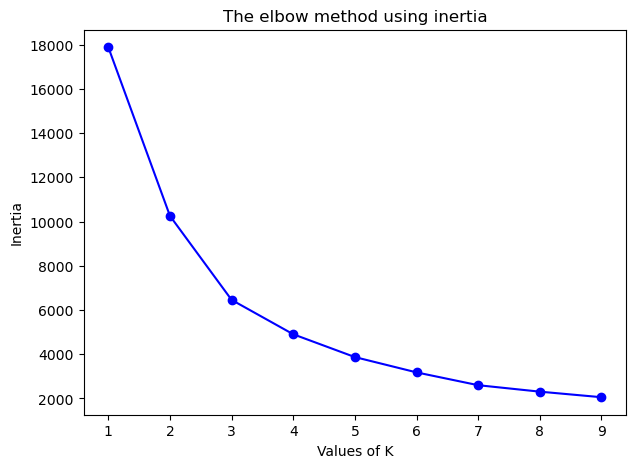

In [39]:
inertia = []                                     ## Sum-of-squared distances
for k in range(1, 10):
    km = util.KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-03, random_state=0
    )
    km.fit_predict(pca_str_sed_df[['PC1', 'PC2']])
    inertia.append(km.inertia_)

util.plt.figure(figsize=(7,5))
util.plt.plot(range(1, 10), 
              inertia, 
              'bo-')
util.plt.xlabel('Values of K')
util.plt.ylabel('Inertia')
util.plt.title('The elbow method using inertia')
util.plt.show()

In [67]:
km = util.KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-03, random_state=0
)
y_km = km.fit_predict(pca_str_sed_df[['PC1', 'PC2', 'PC3']])

In [68]:
y_km = y_km + 1
util.np.unique(y_km)

array([1, 2, 3, 4])

In [69]:
clustered_data = util.pd.concat([str_sed_data[['gid', 'longitude', 'latitude']], 
                                 util.pd.DataFrame(y_km, columns=['clusters'])], 
                                axis=1)

In [70]:
min_lat_limit = sed_min_lat - 1
max_lat_limit = sed_max_lat + 1
min_long_limit = sed_min_long - 1 
max_long_limit = sed_max_long + 1

print(f'Min latitude: {util.np.round(min_lat_limit, 4)}\tMax latitude: {util.np.round(max_lat_limit, 4)}')
print(f'Min longitude: {util.np.round(min_long_limit, 4)}\tMax longitude: {util.np.round(max_long_limit, 4)}')

Min latitude: 16.009	Max latitude: 18.244
Min longitude: 76.25	Max longitude: 78.9851


### Plot based on each cluster

In [71]:
pca_str_sed_df['cluster'] = clustered_data['clusters']
pca_str_sed_df.head()

,gid,longitude,latitude,PC1,PC2,PC3,cluster
0,274643,77.25,17.00904,1.918561,-5.370355,0.463771,3
1,274657,77.25,17.02711,1.632500,-4.597855,0.881827,3
2,274671,77.25,17.04518,3.210389,0.397588,3.604839,1
3,274685,77.25,17.06325,2.817099,1.751440,4.083738,1
4,274699,77.25,17.08132,2.883115,1.203243,4.389991,1


<Axes: xlabel='PC1', ylabel='PC2'>

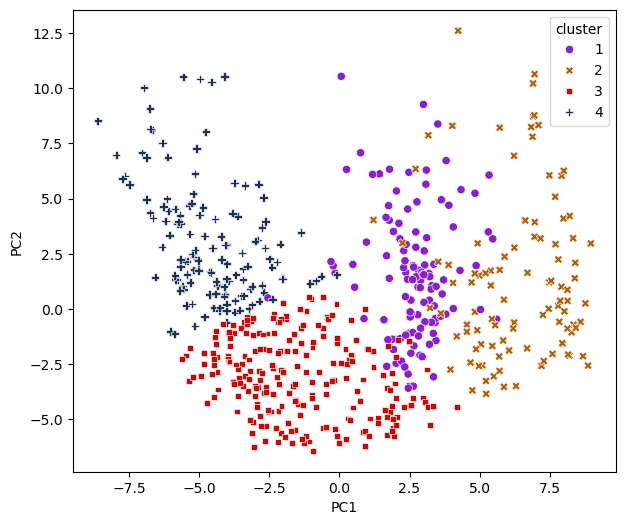

In [72]:
# palette = sns.color_palette("dark", 
#                             as_cmap=False, 
#                             n_colors=len(pca_str_sed_df['cluster'].unique()))

palette = ['#891ed2', '#b45f06', '#d30202', '#203254']
# palette = ['#b45f06', '#d30202', '#203254']

util.plt.figure(figsize=(7,6))
util.sns.scatterplot(x='PC1', 
                     y='PC2', 
                     hue='cluster', 
                     style='cluster', 
                     data=pca_str_sed_df,
                     palette=palette)

In [196]:
# Create a list to store individual figure objects
fig_list = []

# Loop through each cluster
for cluster_id in clustered_data['clusters'].unique():
    # Filter data for the current cluster
    cluster_data = clustered_data[clustered_data['clusters'] == cluster_id]

    hover_text = [f'Sediment ID: {gid}<br>Latitude: {lat}<br>Longitude: {lon}' 
                  for gid, lat, lon in zip(cluster_data['gid'], 
                                           cluster_data['latitude'], 
                                           cluster_data['longitude'])]
    
    # Create a scatter mapbox trace
    trace = go.Scattermapbox(
        lat=cluster_data['latitude'],
        lon=cluster_data['longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color='blue',  # You can assign different colors for each cluster
            opacity=0.8
        ),
        text=hover_text,  # Text to be displayed on hover
        hoverinfo='text'  # Display bore hole id, latitude and longitude text on hover
    )
    
    # Create layout for the map
    layout = go.Layout(
        title=f'Cluster {cluster_id}',
        hovermode='closest',
        mapbox=dict(
            style='open-street-map',  # You can choose different map styles
            center=dict(
                lat=cluster_data['latitude'].mean(),  # Set the map center to the mean of latitudes
                lon=cluster_data['longitude'].mean()  # Set the map center to the mean of longitudes
            ),
            zoom=10, 
            bounds=dict(
                south=min_lat_limit,
                north=max_lat_limit,
                west=min_long_limit,
                east=max_long_limit
            )
        )
    )
    
    # Create figure object and add trace and layout
    fig = go.Figure(data=trace, layout=layout)

    fig.update_layout(
        autosize=False,
        width=700,
        height=700,
    )
    
    # Append the figure to the list
    fig_list.append(fig)

# Display each figure
for fig in fig_list:
    fig.show(renderer='browser')

### Plot combining all clusters

In [75]:
# Assuming clustered_data is your DataFrame and it has 'latitude', 'longitude', 'gid', 'clusters' columns
# colors is your list of color codes, with one color per cluster
# colors = ['#b45f06', '#d30202', '#203254']
colors = ['#891ed2', '#b45f06', '#d30202', '#203254']
# Create separate traces for each cluster
traces = []
for clst in sorted(clustered_data['clusters'].unique()):
    clustered_subset = clustered_data[clustered_data['clusters'] == clst]
    hover_text = [
        f'Latitude: {lat}<br>Longitude: {lon}<br>Sediment ID: {gid}<br>Cluster: {clst}' 
        for lat, lon, gid in zip(clustered_subset['latitude'], 
                                 clustered_subset['longitude'], 
                                 clustered_subset['gid'])
    ]
    
    trace = util.go.Scattermapbox(
        lat=clustered_subset['latitude'],
        lon=clustered_subset['longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=colors[(clst-1) % len(colors)],  # Assign color for the cluster
            opacity=0.8
        ),
        name=f'Cluster {clst}',  # Name will be used in the legend
        text=hover_text,
        hoverinfo='text'
    )
    traces.append(trace)

# Create layout for the map
layout = util.go.Layout(
    title='Kodangal Clusters',
    hovermode='closest',
    mapbox=dict(
        style='open-street-map',
        center=dict(
            lat=clustered_data['latitude'].mean(),
            lon=clustered_data['longitude'].mean()
        ),
        zoom=10,
        bounds=dict(
            south=min_lat_limit,
            north=max_lat_limit,
            west=min_long_limit,
            east=max_long_limit
        )
    ),
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="right",
        x=1.1
    )
)

# Create figure object and add traces and layout
fig = util.go.Figure(data=traces, layout=layout)

fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,
)

# Display the figure
fig.show(renderer='browser')


In [76]:
str_sed_data['cluster'] = clustered_data['clusters']
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,ta,w,u,toposheet,in_,f,te,tl,hg,cluster
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0,3
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0,3
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0,1
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0,1
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0,1


In [66]:
str_sed_data.to_csv(data_path+'/Kodangal dataset/3 clusters/clst3_Kodangal_gcM.csv', index=False)

In [77]:
str_sed_data.to_csv(data_path+'/Kodangal dataset/4 clusters/clst4_Kodangal_gcM.csv', index=False)